<a href="https://colab.research.google.com/github/mmdsadra/GA/blob/main/findThePoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
n = int(input())
k = int(input())
p = [int(input()) for _ in range(k)]

6
6
-30
30
-20
20
10
-10


In [ ]:
import random
def init_first_pop(size, n):
  ch = []
  for i in range(size):
    ch.append([random.getrandbits(1) for _ in range((n + 1))])
  return ch

def cross_over(ch, n, pc): #1point
  newPop = []
  for i in range(len(ch)):
    if(random.random() <= pc):
      r = random.randint(1, len(ch[i]) - 1)
      newPop.append(ch[i][:r] + ch[(i+1) % (n)][r:])
    else:
      newPop.append(ch[i])
  return newPop

def mutation(ch, n, pm):
  newPop = []
  for i in range(len(ch)):
    if(random.random() <= pm):
      r = random.randint(1, len(ch[i]) - 1)
      newPop.append(ch[i][:r-1] + [(ch[i][r] + 1) % 2] + ch[i][r:])
    else:
      newPop.append(ch[i])
  return newPop

def toInt(s):
  z = 1
  if(s[0] == '1'):
    z = -1
  tmp = int(s[1:], 2)
  return tmp * z

def OF(a):
  sum = 0
  for point in p:
    sum += (toInt(''.join(map(str, a))) - point) #edit / no negative!
  return sum

def FF(a):
  return 1/(OF(a) + 1)

def selection(ch, new_ch, n):
  newPop = []
  bestOld = ch[0]
  for point in ch:
    if(FF(point) >= FF(bestOld)):
      bestOld = point
  sumOfFF = 0
  maxFF = -10
  for point in new_ch:
    tmp = FF(point)
    sumOfFF += tmp
    if(tmp >= maxFF):
      maxFF = tmp
  P = []
  for point in new_ch:
    P.append(FF(point) / sumOfFF)
  CP = []
  last = 0
  for i in range(len(new_ch)):
    CP.append(last + P[i])
    last += P[i]
  for i in range(n):
    r = random.random()
    for j in range(len(new_ch)):
      if(r <= CP[j]):
        newPop.append(new_ch[j])
        break
  if(maxFF <= FF(bestOld)):
    newPop[0] = bestOld
  return newPop

first population :  [[0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 1, 0, 0, 1], [1, 0, 1, 1, 0, 1, 0], [1, 1, 0, 1, 1, 0, 0], [0, 0, 0, 1, 1, 1, 1], [0, 0, 0, 0, 1, 1, 0], [1, 1, 0, 0, 1, 1, 0], [0, 0, 0, 0, 0, 1, 1], [1, 1, 1, 0, 0, 0, 0], [1, 1, 0, 1, 0, 1, 1], [1, 0, 1, 0, 0, 1, 0], [0, 0, 1, 1, 0, 0, 1], [0, 0, 1, 0, 0, 0, 1], [1, 0, 1, 1, 0, 1, 0], [0, 1, 1, 1, 0, 1, 0], [0, 0, 0, 1, 1, 0, 1], [0, 0, 1, 1, 0, 1, 1], [1, 0, 0, 1, 1, 1, 1], [0, 1, 1, 1, 0, 0, 0], [1, 1, 1, 0, 1, 1, 0], [0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 1, 1, 1], [1, 1, 0, 0, 1, 1, 1], [1, 0, 0, 0, 0, 0, 0], [1, 1, 0, 1, 1, 1, 1], [0, 1, 1, 1, 0, 1, 0], [1, 0, 1, 0, 0, 1, 1], [1, 1, 0, 1, 0, 1, 1], [0, 0, 0, 1, 0, 0, 1], [0, 0, 0, 0, 1, 1, 0]] 

Best answer:  4


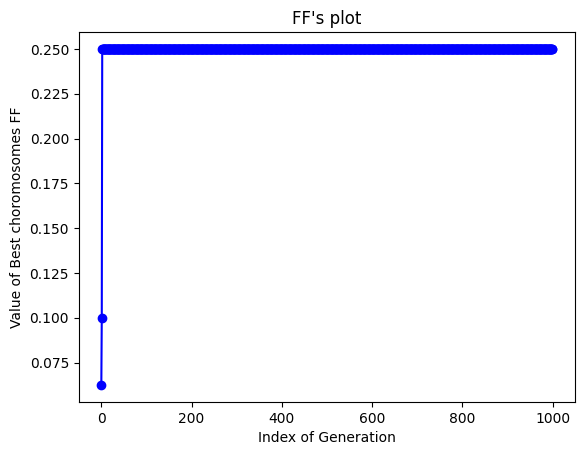

In [ ]:
firstPop = 30  # first population length = 20
P_m = 0.1
P_c = 0.8

ch = []
ch = init_first_pop(firstPop, n)
print('first population : ', ch, '\n')

x = []
for _ in range(1000):
  ch_new = cross_over(ch, firstPop, P_c)
  ch_new = mutation(ch_new, firstPop, P_m)
  ch = selection(ch, ch_new, firstPop)
  best = ch[0]
  for point in ch:
    if(FF(best) <= FF(point)):
        best = point
  x.append(FF(best))
print("Best answer: ", toInt(''.join(map(str, best))))

import matplotlib.pyplot as plt
plt.plot(x, marker='o', linestyle='-', color='b')
plt.xlabel('Index of Generation')
plt.ylabel('Value of Best choromosomes FF')
plt.title('FF\'s plot')
plt.show()